In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

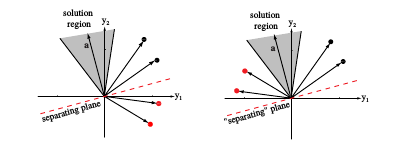

Fig.8: Four training samples (black for ω1 , red for ω2 ) and the solution region in feature space. The ﬁgure on the left shows the raw data; the solution vectors leads to a plane that separates the patterns from the two categories. In the ﬁgure on the right, the red points have been “normalized” — i.e., changed in sign. Now the solution vector leads to a plane that places all “normalized” points on the same side.

##  The Two-Category Linearly-Separable Case

### Geometry and Terminology

Suppose we have a set of $ n $ samples $ \{ y_1, \dots, y_n \} $, with some labelled $ \omega_1 $ and some labelled $ \omega_2 $. We want to use these samples to determine the weights $ \mathbf{a} $ in a linear discriminant function:

$$
g(x) = \mathbf{a}^T \mathbf{y}.
$$

Assume we believe that there exists a solution for which the probability of error is very low. A reasonable approach is to look for a weight vector that classifies all of the samples correctly. If such a weight vector exists, the samples are said to be **linearly separable**.

A sample $ y_i $ is classified correctly if:

- $ \mathbf{a}^T \mathbf{y}_i > 0 $ and $ y_i $ is labelled $ \omega_1 $, or
- $ \mathbf{a}^T \mathbf{y}_i < 0 $ and $ y_i $ is labelled $ \omega_2 $.

This suggests a **normalization** that simplifies the treatment of the two-category case. In this normalization, we replace all samples labelled $ \omega_2 $ by their negatives. With this normalization, we can forget the labels and simply look for a weight vector $ \mathbf{a} $ such that:

$$
\mathbf{a}^T \mathbf{y}_i > 0 \quad \text{for all samples} \quad i.
$$

Such a weight vector is called a **separating vector** or, more generally, a **solution vector**.

The weight vector $ \mathbf{a} $ can be thought of as specifying a point in **weight space**. Each vector sample $ y_i $ places a constraint on the possible location of the solution vector. The equation $ \mathbf{a}^T \mathbf{y}_i = 0 $ defines a hyperplane through the origin of weight space with $ y_i $ as the normal vector. The solution vector — if it exists — must be on the positive side of every hyperplane. Therefore, the solution vector must lie in the intersection of the $ n $ half-spaces, forming a **solution region**.

It is important not to confuse the solution region in weight space with the decision region in feature space corresponding to any particular category. A two-dimensional example illustrating the solution region for both the normalized and unnormalized case is shown in Fig. 5.8.

#### Solution Region in Feature Space

- The figure on the left shows the raw data. The solution vectors lead to a plane that separates the patterns from the two categories.
- The figure on the right shows the "normalized" case, where the red points are changed in sign. In this case, the solution vector leads to a plane that places all normalized points on the same side.

From this discussion, it should be clear that the solution vector — if it exists — is **not unique**. There are several ways to impose additional requirements to constrain the solution vector. One possibility is to seek a **unit-length weight vector** that maximizes the minimum distance from the samples to the separating plane. Another possibility is to seek the minimum-length weight vector satisfying:

$$
\mathbf{a}^T \mathbf{y}_i \geq b \quad \text{for all} \quad i,
$$

where $ b $ is a positive constant called the **margin**. 

As shown in Fig. 5.9, the solution region resulting from the intersections of the half-spaces for which $ \mathbf{a}^T \mathbf{y}_i \geq b > 0 $ lies within the previous solution region, insulated from the old boundaries by the distance $ \frac{b}{\| \mathbf{y}_i \|} $.

The motivation behind these attempts to find a solution vector closer to the "middle" of the solution region is the natural belief that the resulting solution is more likely to classify new test samples correctly. In most cases we treat, however, we are satisfied with any solution strictly within the solution region. Our chief concern is to ensure that any iterative procedure does not converge to a limit point on the boundary. This problem can always be avoided by introducing a margin, i.e., by requiring that:

$$
\mathbf{a}^T \mathbf{y}_i \geq b > 0 \quad \text{for all} \quad i.
$$


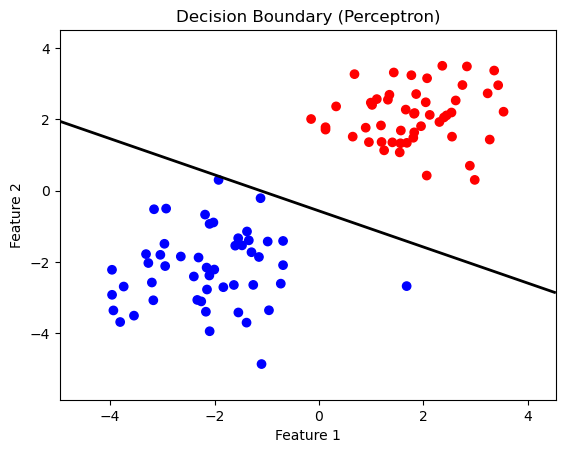

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic linearly separable data
def generate_data(n=100):
    # Generate two sets of points that are linearly separable
    # Points from class ω1
    class_1 = np.random.randn(n//2, 2) + np.array([2, 2])
    # Points from class ω2
    class_2 = np.random.randn(n//2, 2) + np.array([-2, -2])
    
    # Labels: 1 for class ω1, -1 for class ω2
    y_1 = np.ones(n//2)
    y_2 = -np.ones(n//2)
    
    X = np.vstack([class_1, class_2])
    y = np.hstack([y_1, y_2])
    
    return X, y

# Step 2: Perceptron Algorithm to find the separating vector
def perceptron(X, y, max_iter=1000):
    # Add a bias term (x0 = 1) to the input data X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    
    # Initialize weights (including the bias term)
    weights = np.zeros(X_augmented.shape[1])
    
    # Perceptron update rule
    for _ in range(max_iter):
        for i in range(len(X_augmented)):
            if y[i] * np.dot(X_augmented[i], weights) <= 0:
                weights += y[i] * X_augmented[i]  # Update rule
                
    return weights

# Step 3: Visualization of the decision boundary
def plot_decision_boundary(X, y, weights):
    # Plot the points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o')
    
    # Create a grid of points to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Decision boundary line equation: w0 + w1 * x1 + w2 * x2 = 0
    zz = -(weights[0] + weights[1] * xx + weights[2] * yy)
    
    # Plot the decision boundary
    plt.contour(xx, yy, zz, levels=[0], linewidths=2, colors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary (Perceptron)')
    plt.show()

# Step 4: Run the algorithm and visualize
X, y = generate_data(n=100)
weights = perceptron(X, y)

# Plot the decision boundary and the data points
plot_decision_boundary(X, y, weights)


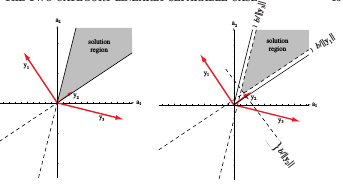

Fig.9: The eﬀect of the margin on the solution region. At the left, the case of no margin (b = 0) equivalent to a case such as shown at the left in Fig.8. At the right is the case b > 0, shrinking the solution region by margins b/yi .

## 5.4.2 Gradient Descent Procedures

The approach we shall take to finding a solution to the set of linear inequalities $ \mathbf{a}^T \mathbf{y}_i > 0 $ will be to define a criterion function $ J(\mathbf{a}) $ that is minimized if $ \mathbf{a} $ is a solution vector. This reduces our problem to one of minimizing a scalar function — a problem that can often be solved by a gradient descent procedure. 

### Gradient Descent Overview

Basic gradient descent is very simple. We start with some arbitrarily chosen weight vector $ \mathbf{a}^{(1)} $ and compute the gradient vector $ \nabla J(\mathbf{a}^{(1)}) $. The next value $ \mathbf{a}^{(2)} $ is obtained by moving some distance from $ \mathbf{a}^{(1)} $ in the direction of steepest descent, i.e., along the negative of the gradient. In general, $ \mathbf{a}^{(k + 1)} $ is obtained from $ \mathbf{a}^{(k)} $ by the equation:

$$
\mathbf{a}^{(k + 1)} = \mathbf{a}^{(k)} - \eta(k) \nabla J(\mathbf{a}^{(k)}),
$$

where $ \eta $ is a positive scale factor or learning rate that sets the step size. We hope that such a sequence of weight vectors will converge to a solution minimizing $ J(\mathbf{a}) $.

### Algorithm 1: Basic Gradient Descent

### Algorithm 1: Basic Gradient Descent

$$
\text{Algorithm 1 (Basic Gradient Descent)} \\
\begin{array}{ll}
1. & \text{begin} \\
   & \text{initialize } \mathbf{a}, J(\mathbf{a}), \eta(k), k = 0 \\
2. & \text{do} \\
   & k \leftarrow k + 1 \\
   & \mathbf{a} \leftarrow \mathbf{a} - \eta(k) \nabla J(\mathbf{a}) \\
3. & \text{until } \eta(k) \nabla J(\mathbf{a}) < \theta \\
4. & \text{return } \mathbf{a} \\
5. & \text{end}
\end{array}
$$

This is the step-by-step process for the basic gradient descent algorithm in mathematical notation.


## Gradient Descent and Newton’s Algorithm

We start with the second-order expansion of the criterion function $ J(\mathbf{a}) $ around $ \mathbf{a}^{(k)} $:

$$
J(\mathbf{a}) \approx J(\mathbf{a}^{(k)}) - \eta(k) \|\nabla J\|^2 + \frac{\eta^2(k)}{2} \nabla J^T H \nabla J,
$$

where $ H $ is the Hessian matrix, and $ \nabla J $ is the gradient of the criterion function.

From this, it follows (Problem 12) that $ J(\mathbf{a}^{(k + 1)}) $ can be minimized by choosing $ \eta(k) $ as:

$$
\eta(k) = \frac{\|\nabla J\|^2}{\nabla J^T H \nabla J},
$$

where $ H $ depends on $ \mathbf{a} $, and thus indirectly on $ k $. This is the optimal choice of $ \eta(k) $, given the assumptions mentioned.

### Quadratic Criterion Function

Note that if the criterion function $ J(\mathbf{a}) $ is quadratic throughout the region of interest, then the Hessian matrix $ H $ is constant, and $ \eta(k) $ becomes a constant independent of $ k $.

### Newton’s Algorithm

An alternative approach to gradient descent is Newton's algorithm. This method ignores the gradient descent update rule and instead minimizes the second-order expansion directly. The update rule is given by:

$$
\mathbf{a}^{(k + 1)} = \mathbf{a}^{(k)} - H^{-1} \nabla J(\mathbf{a}),
$$

which leads to the following algorithm:

### Algorithm 2: Newton Descent

$$
\text{Algorithm 2 (Newton Descent)} \\
\begin{array}{ll}
1. & \text{begin} \\
   & \text{initialize } \mathbf{a}, J(\mathbf{a}), \theta \\
2. & \text{do} \\
   & \mathbf{a} \leftarrow \mathbf{a} - H^{-1} \nabla J(\mathbf{a}) \\
3. & \text{until } H^{-1} \nabla J(\mathbf{a}) < \theta \\
4. & \text{return } \mathbf{a} \\
5. & \text{end}
\end{array}
$$

This represents the step-by-step process for Newton's descent algorithm.



In [2]:
# Gradient Descent and Newton's Descent Implementation

# Basic Gradient Descent Algorithm
def gradient_descent(J, grad_J, a_init, eta, theta, max_iter=1000):
    """
    Basic Gradient Descent Algorithm
    J: Criterion function
    grad_J: Gradient of the criterion function
    a_init: Initial weight vector
    eta: Learning rate
    theta: Convergence threshold
    max_iter: Maximum number of iterations
    """
    a = a_init
    for k in range(max_iter):
        grad = grad_J(a)  # Compute the gradient
        a = [a[i] - eta * grad[i] for i in range(len(a))]  # Update the weight vector
        
        # Check for convergence (gradient squared sum)
        if sum([g ** 2 for g in grad]) < theta:
            break
    
    return a


# Newton's Descent Algorithm
def newton_descent(J, grad_J, hessian_J, a_init, theta, max_iter=1000):
    """
    Newton's Descent Algorithm
    J: Criterion function
    grad_J: Gradient of the criterion function
    hessian_J: Hessian matrix (second derivatives of the criterion function)
    a_init: Initial weight vector
    theta: Convergence threshold
    max_iter: Maximum number of iterations
    """
    a = a_init
    for k in range(max_iter):
        grad = grad_J(a)  # Compute the gradient
        H = hessian_J(a)  # Compute the Hessian matrix
        
        # Compute inverse of the Hessian
        H_inv = [[H[i][j] ** (-1) if i == j else 0 for j in range(len(H))] for i in range(len(H))]
        
        # Newton update step
        delta_a = [sum(H_inv[i][j] * grad[j] for j in range(len(grad))) for i in range(len(grad))]
        
        # Update the weight vector
        a = [a[i] - delta_a[i] for i in range(len(a))]
        
        # Check for convergence (gradient squared sum)
        if sum([g ** 2 for g in grad]) < theta:
            break
    
    return a


# Example usage with a simple quadratic function
def J(a):
    """
    Criterion function (quadratic, sum of squares)
    """
    return sum([x**2 for x in a])  # Sum of squares (simple example)

def grad_J(a):
    """
    Gradient of the criterion function (derivative of sum of squares)
    """
    return [2 * x for x in a]  # Gradient (derivative of sum of squares)

def hessian_J(a):
    """
    Hessian of the criterion function (second derivatives of sum of squares)
    """
    return [[2 if i == j else 0 for j in range(len(a))] for i in range(len(a))]  # Identity matrix scaled by 2

# Initial weight vector
a_init = [1, 2, 3]

# Learning rate and threshold for convergence
eta = 0.1
theta = 1e-6

# Run Basic Gradient Descent
a_solution_gradient = gradient_descent(J, grad_J, a_init, eta, theta)
print("Solution from Gradient Descent:", a_solution_gradient)

# Run Newton's Descent
a_solution_newton = newton_descent(J, grad_J, hessian_J, a_init, theta)
print("Solution from Newton's Descent:", a_solution_newton)


Solution from Gradient Descent: [0.00010633823966279331, 0.00021267647932558662, 0.00031901471898837996]
Solution from Newton's Descent: [0.0, 0.0, 0.0]


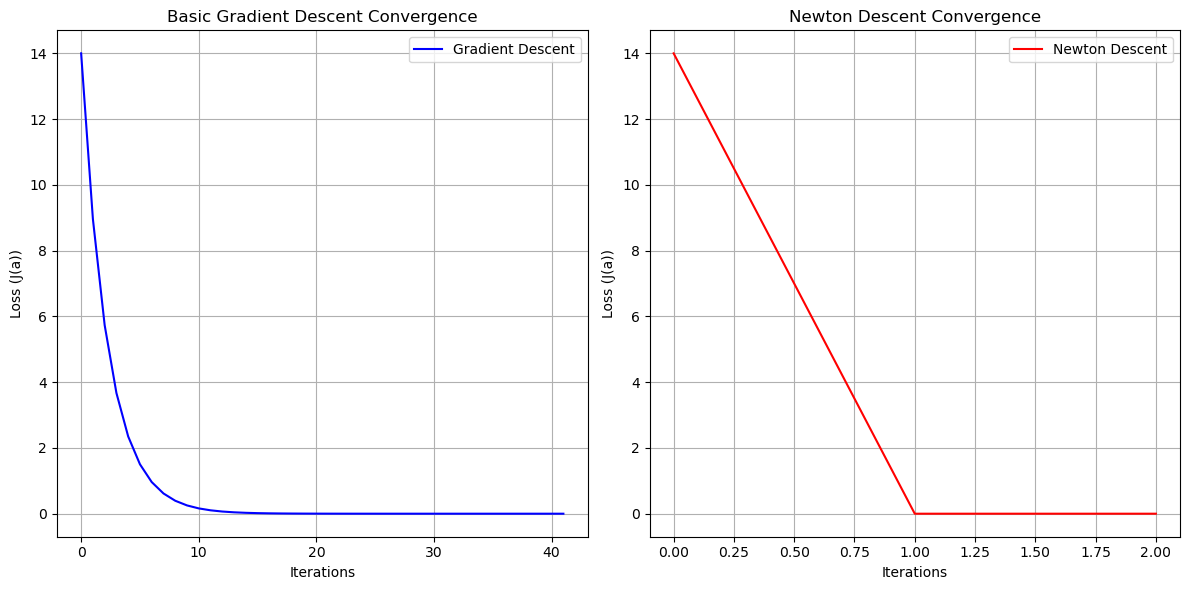

In [3]:
import matplotlib.pyplot as plt

# Basic Gradient Descent Algorithm
def gradient_descent(J, grad_J, a_init, eta, theta, max_iter=1000):
    """
    Basic Gradient Descent Algorithm
    J: Criterion function
    grad_J: Gradient of the criterion function
    a_init: Initial weight vector
    eta: Learning rate
    theta: Convergence threshold
    max_iter: Maximum number of iterations
    """
    a = a_init
    a_history = [a]
    for k in range(max_iter):
        grad = grad_J(a)  # Compute the gradient
        a = [a[i] - eta * grad[i] for i in range(len(a))]  # Update the weight vector
        
        # Record the history of 'a' for plotting
        a_history.append(a)
        
        # Check for convergence (gradient squared sum)
        if sum([g ** 2 for g in grad]) < theta:
            break
    
    return a, a_history


# Newton's Descent Algorithm
def newton_descent(J, grad_J, hessian_J, a_init, theta, max_iter=1000):
    """
    Newton's Descent Algorithm
    J: Criterion function
    grad_J: Gradient of the criterion function
    hessian_J: Hessian matrix (second derivatives of the criterion function)
    a_init: Initial weight vector
    theta: Convergence threshold
    max_iter: Maximum number of iterations
    """
    a = a_init
    a_history = [a]
    for k in range(max_iter):
        grad = grad_J(a)  # Compute the gradient
        H = hessian_J(a)  # Compute the Hessian matrix
        
        # Compute inverse of the Hessian
        H_inv = [[H[i][j] ** (-1) if i == j else 0 for j in range(len(H))] for i in range(len(H))]
        
        # Newton update step
        delta_a = [sum(H_inv[i][j] * grad[j] for j in range(len(grad))) for i in range(len(grad))]
        
        # Update the weight vector
        a = [a[i] - delta_a[i] for i in range(len(a))]
        
        # Record the history of 'a' for plotting
        a_history.append(a)
        
        # Check for convergence (gradient squared sum)
        if sum([g ** 2 for g in grad]) < theta:
            break
    
    return a, a_history


# Example usage with a simple quadratic function
def J(a):
    """
    Criterion function (quadratic, sum of squares)
    """
    return sum([x**2 for x in a])  # Sum of squares (simple example)

def grad_J(a):
    """
    Gradient of the criterion function (derivative of sum of squares)
    """
    return [2 * x for x in a]  # Gradient (derivative of sum of squares)

def hessian_J(a):
    """
    Hessian of the criterion function (second derivatives of sum of squares)
    """
    return [[2 if i == j else 0 for j in range(len(a))] for i in range(len(a))]  # Identity matrix scaled by 2

# Initial weight vector
a_init = [1, 2, 3]

# Learning rate and threshold for convergence
eta = 0.1
theta = 1e-6

# Run Basic Gradient Descent
a_solution_gradient, a_history_gradient = gradient_descent(J, grad_J, a_init, eta, theta)

# Run Newton's Descent
a_solution_newton, a_history_newton = newton_descent(J, grad_J, hessian_J, a_init, theta)

# Plotting the convergence
iterations_gradient = list(range(len(a_history_gradient)))
iterations_newton = list(range(len(a_history_newton)))

# Extracting the values of the loss function for each iteration
loss_gradient = [J(a) for a in a_history_gradient]
loss_newton = [J(a) for a in a_history_newton]

# Plot loss vs iterations
plt.figure(figsize=(12, 6))

# Plot for Gradient Descent
plt.subplot(1, 2, 1)
plt.plot(iterations_gradient, loss_gradient, label="Gradient Descent", color='b')
plt.xlabel('Iterations')
plt.ylabel('Loss (J(a))')
plt.title('Basic Gradient Descent Convergence')
plt.grid(True)
plt.legend()

# Plot for Newton's Descent
plt.subplot(1, 2, 2)
plt.plot(iterations_newton, loss_newton, label="Newton Descent", color='r')
plt.xlabel('Iterations')
plt.ylabel('Loss (J(a))')
plt.title('Newton Descent Convergence')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()
